# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# IMPORTING AND VISUALIZING THE DATA

In [2]:
adult=pd.read_csv('adult.csv', na_values=["?"])
print(adult.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

Replacing missing values with NAN values.

In [3]:
adult_new=adult.dropna(axis=0)
print(adult_new.head())
print('Dimensions:',adult.shape)

   age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States

In [4]:
col=adult_new.columns
data_type=adult_new.dtypes
uniq=adult_new.nunique()

print("\n%30s  %10s   %10s\n " % ("Column Name", "Data Type", "Unique Values"))
for i in range(len(adult_new.columns)):
    print("%30s  %10s   %10s " % (col[i],data_type[i],uniq[i]))

print("\nDimensions:",adult_new.shape[0],'rows and ',adult_new.shape[1],'columns')


                   Column Name   Data Type   Unique Values
 
                           age       int64           72 
                     workclass      object            7 
                        fnlwgt       int64        20263 
                     education      object           16 
                 education.num       int64           16 
                marital.status      object            7 
                    occupation      object           14 
                  relationship      object            6 
                          race      object            5 
                           sex      object            2 
                  capital.gain       int64          118 
                  capital.loss       int64           90 
                hours.per.week       int64           94 
                native.country      object           41 
                        income      object            2 

Dimensions: 30162 rows and  15 columns


In [5]:

adult_new['income'].replace({'<=50K':0,'>50K':1},inplace=True)
adult_new=adult_new.drop('education.num',axis=1)

Visualising the various values under the categorical columns.


In [6]:
from collections import Counter
occupatn=dict(Counter(adult_new['occupation'])).keys()
print('Occupation types:','\n',list(occupatn),'\n')
race=dict(Counter(adult_new['race'])).keys()
print('Race types:','\n',list(race),'\n')
relation=dict(Counter(adult_new['relationship'])).keys()
print('Relation types:','\n',list(relation),'\n')
educate=dict(Counter(adult_new['education'])).keys()
print('Education levels:','\n',list(educate),'\n')
marital=dict(Counter(adult_new['marital.status'])).keys()
print('Marital status levels:','\n',list(marital),'\n')
work=dict(Counter(adult_new['workclass'])).keys()
print('Workclass levels:','\n',list(work),'\n')
country=dict(Counter(adult_new['native.country'])).keys()
print('Native countries:','\n',list(country),'\n')

Occupation types: 
 ['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty', 'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales', 'Craft-repair', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Handlers-cleaners', 'Armed-Forces', 'Priv-house-serv'] 

Race types: 
 ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'] 

Relation types: 
 ['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband', 'Wife'] 

Education levels: 
 ['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', 'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc', '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'] 

Marital status levels: 
 ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'] 

Workclass levels: 
 ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay'] 

Native countries: 
 ['United-States', 'Mexico', 'Greece', 'Vi

Finding the correlation of all the other variables with the dependent variable by creating a heatmap.

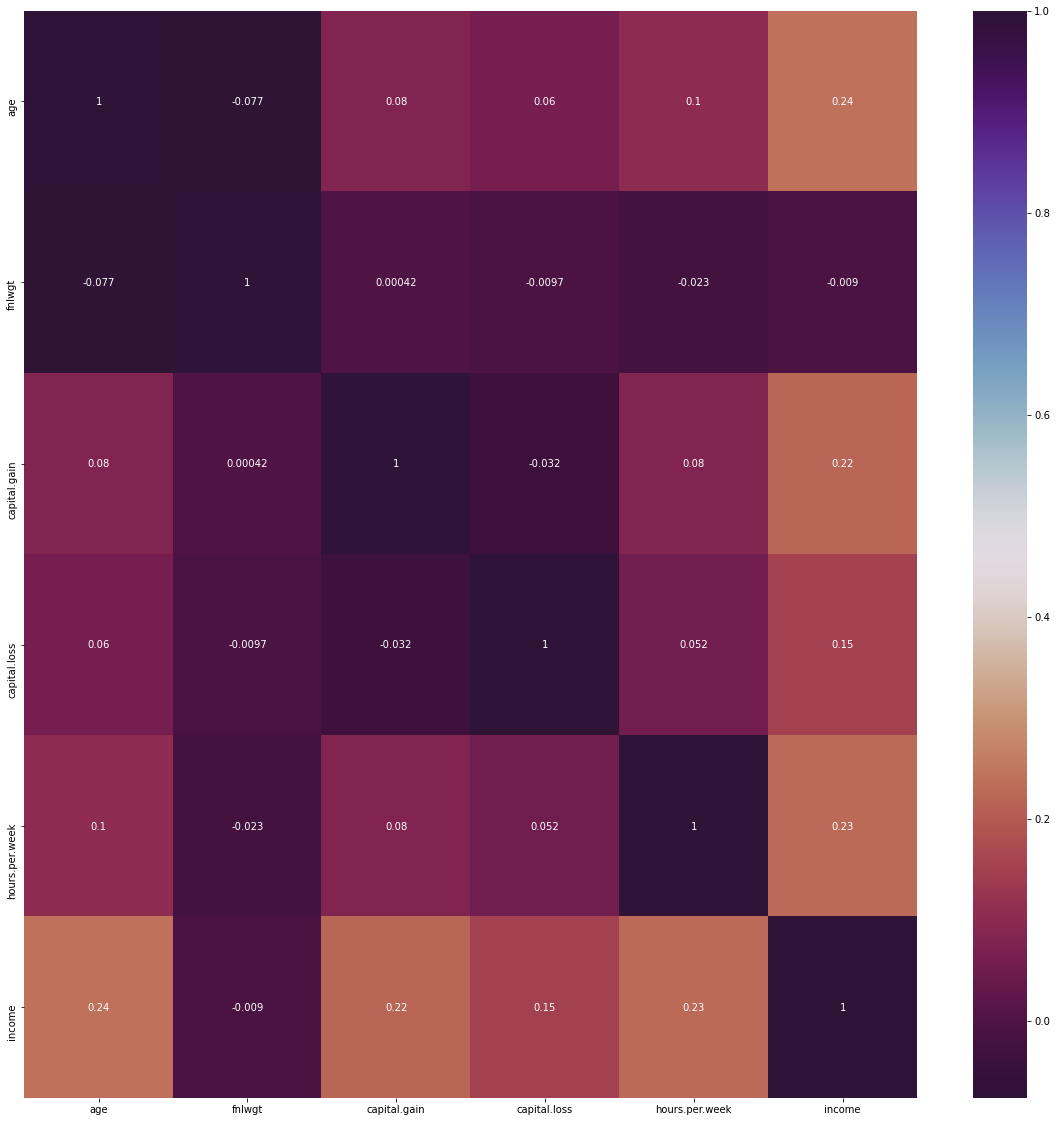

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = adult_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(adult_new[top_corr_features].corr(),annot=True,cmap="twilight_shifted_r")

Here, 'fnlwgt' correlate nagatively with the 'income' and hence I will drop it.

BISERIAL CORRELATION

In [8]:
import scipy.stats as stats
a=['age','capital.loss','capital.gain','hours.per.week','fnlwgt']
for i in a:
    print(i,':',stats.pointbiserialr(adult_new['income'],adult_new[i])[0])


age : 0.2419981362661182
capital.loss : 0.15005330839729686
capital.gain : 0.221196214548057
hours.per.week : 0.22948012988851038
fnlwgt : -0.008957423359171629


The 'fnlwgt' has a negative correation with 'income' and hence I will drop the column and the remaining varibales are such.

In [9]:
adult_new=adult_new.drop('fnlwgt',axis=1)
adult_new.dtypes

age                int64
workclass         object
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [10]:
categorical_cols = adult_new.columns[adult_new.dtypes==object].tolist()
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

CHI SQUARE ESTIMATE

I set the value of alpha as 0.01. If the p-value is less than alpha, I will reject H0 and hence the variables are related.

In [12]:

def cross_tab(obs1=[]):
    observed=pd.crosstab(obs1,adult_new['income'])
    val=stats.chi2_contingency(observed)
    return(val[1])

In [13]:
alpha=0.01
df=adult_new.drop('income',axis=1)
count=0
attributes2=[]
for i in categorical_cols:
    p_value=cross_tab(adult_new[i])
    if p_value<=alpha:
        count+=1
        attributes2.append(i)
print('Number of attributes contributing:',count,'\n')
print(attributes2)

Number of attributes contributing: 8 

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


Contingency table

In [14]:
pd.crosstab(adult.relationship,adult_new['income'])

income,0,1
relationship,,
Husband,6784,5679
Not-in-family,6903,823
Other-relative,854,35
Own-child,4402,64
Unmarried,2999,213
Wife,712,694


CATEGORICAL VARIABLES

In [15]:
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

Encoding them using get_dummies

In [16]:
adult_new1=pd.get_dummies(adult_new,columns=categorical_cols)
adult_new1.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,0,4356,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,0,3900,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,0,3900,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,0,3770,45,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,0,3770,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
adult_new1.columns

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'income',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       ...
       'native.country_Portugal', 'native.country_Puerto-Rico',
       'native.country_Scotland', 'native.country_South',
       'native.country_Taiwan', 'native.country_Thailand',
       'native.country_Trinadad&Tobago', 'native.country_United-States',
       'native.country_Vietnam', 'native.country_Yugoslavia'],
      dtype='object', length=103)

Normalizing

Using the min max normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
mms = MinMaxScaler()
min_max_scaled_columns = mms.fit_transform(adult_new1[columns_to_scale])
#processed_data = np.concatenate([min_max_scaled_columns, adult_new], axis=1)
adult_new1['age'],adult_new1['capital.gain'],adult_new1['capital.loss'],adult_new1['hours.per.week']=min_max_scaled_columns[:,0],min_max_scaled_columns[:,1],min_max_scaled_columns[:,2],min_max_scaled_columns[:,3]
adult_new1.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,0.890411,0.0,1.000000,0.173469,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.506849,0.0,0.895317,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.328767,0.0,0.895317,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0.232877,0.0,0.865473,0.448980,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.287671,0.0,0.865473,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Feature selection

In [19]:
category=adult_new1.columns[adult_new1.dtypes!=object].tolist()[5:]
#category
alpha=0.01
#df=adult_new.drop('income',axis=1)
count=0
features=[]
for i in category:
    p_value=cross_tab(adult_new1[i])
    if p_value<=alpha:
        count+=1
        features.append(i)
        #print(i,' has a relation')
        #print('p-value for ',i,' is ',cross_tab(adult_new[i]),'\n')
print('Number of contributing attributes:',count,'\n')
print(features)

Number of contributing attributes: 60 

['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital.status_Divorced', 'marital.status_Married-civ-spouse', 'marital.status_Married-spouse-absent', 'marital.status_Never-married', 'marital.status_Separated', 'marital.status_Widowed', 'occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occup

According to chi square test, only 65 attributes contribute to the dependent variable.

In [20]:
features.append('age')
features.append('capital.gain')
features.append('capital.loss')
features.append('hours.per.week')
features.append('income')

In [21]:
adult_new1[features].head()


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native.country_Mexico,native.country_Puerto-Rico,native.country_Taiwan,native.country_United-States,native.country_Vietnam,age,capital.gain,capital.loss,hours.per.week,income
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0.890411,0.0,1.000000,0.173469,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0.506849,0.0,0.895317,0.397959,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0.328767,0.0,0.895317,0.397959,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0.232877,0.0,0.865473,0.448980,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0.287671,0.0,0.865473,0.397959,0


Heatmap

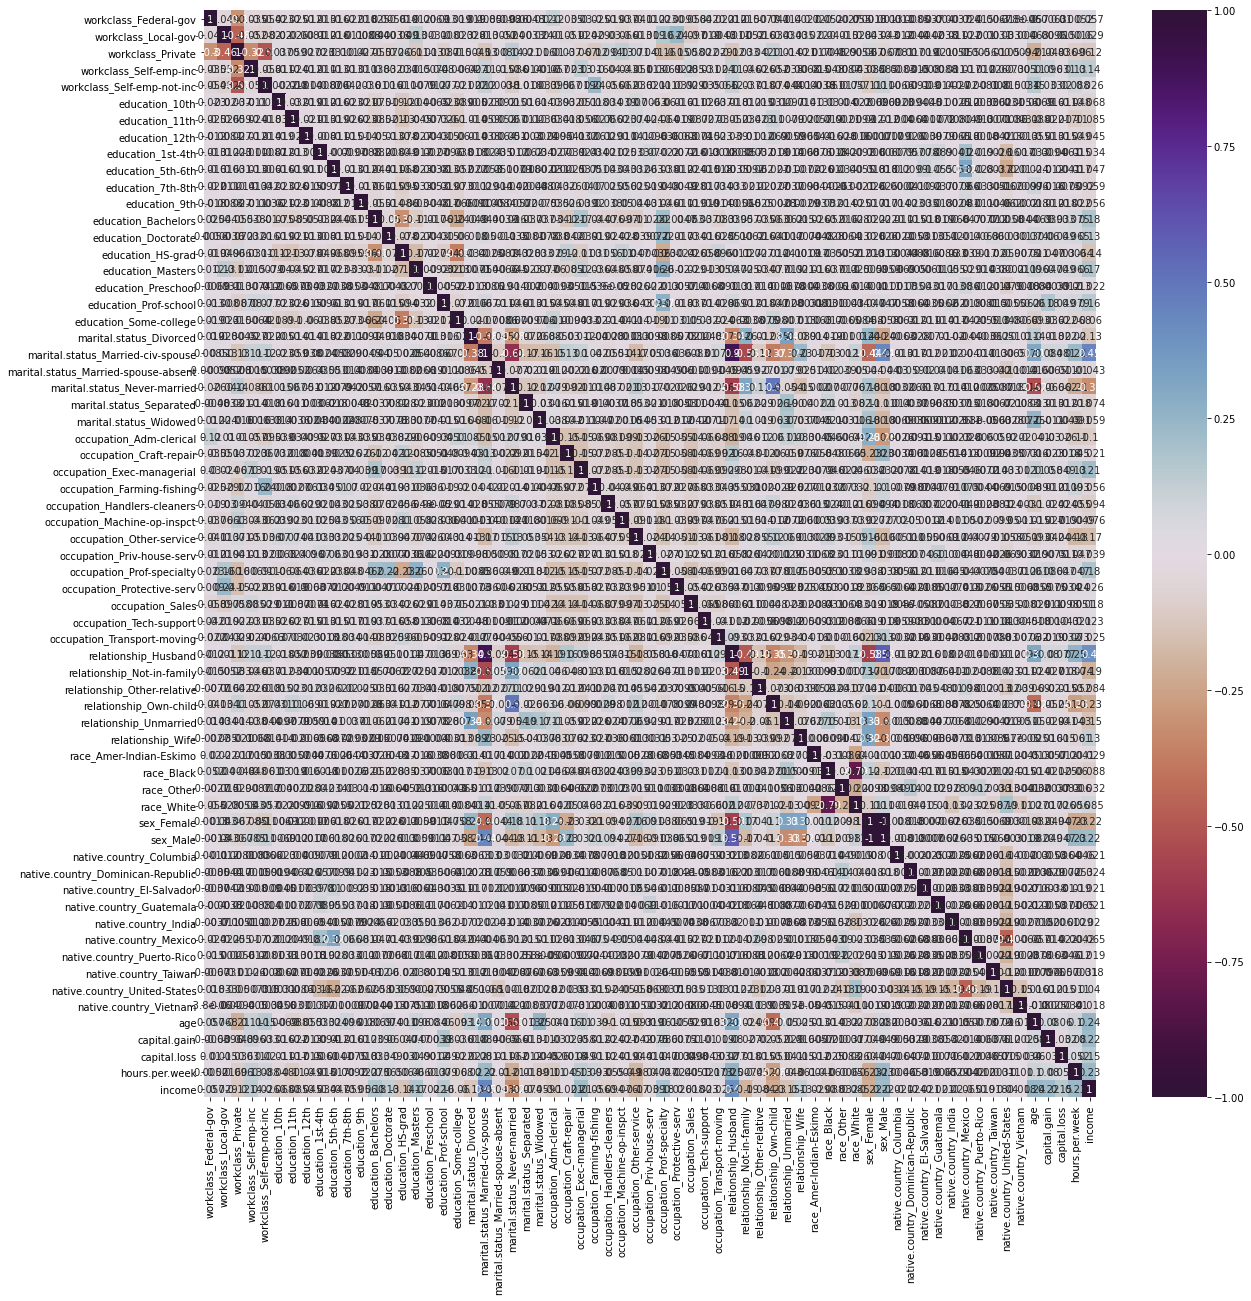

In [22]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = adult_new1[features].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(adult_new1[top_corr_features].corr(),annot=True,cmap="twilight_shifted_r")

# EXPLORATORY DATA ANALYSIS(EDA)

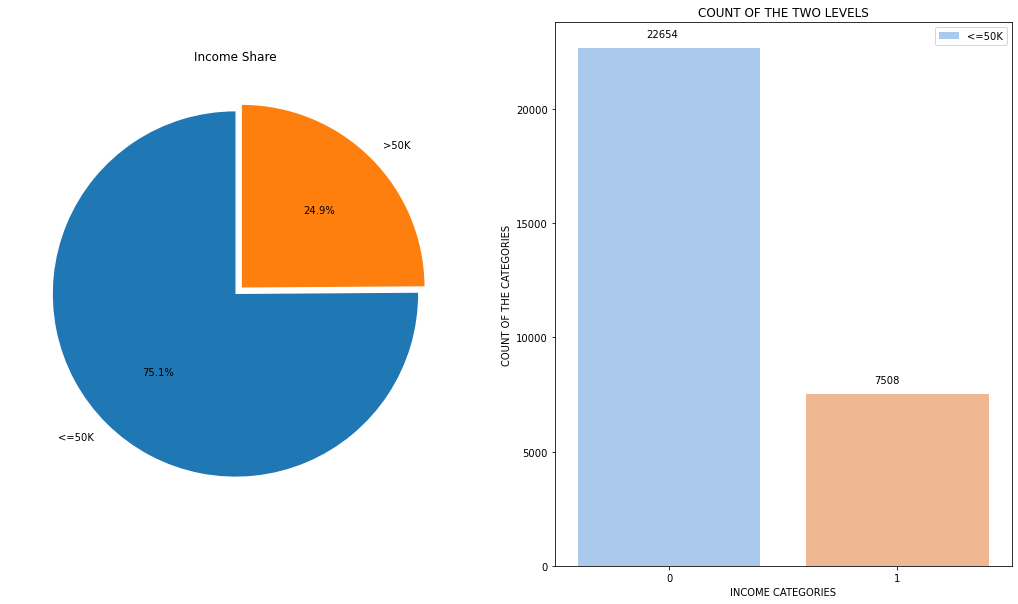

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,10))
#plt.figure(figsize=(7,10))
income1=adult_new1['income'].value_counts()
ax[0].pie(income1,explode=(0,0.05),autopct='%1.1f%%',startangle=90,labels=['<=50K','>50K'])
ax[0].set_title('Income Share')
ax[1]=sns.countplot(x='income',data=adult_new1,palette='pastel')
ax[1].legend(labels=['<=50K','>50K'])
ax[1].set(xlabel="INCOME CATEGORIES")
ax[1].set(ylabel='COUNT OF THE CATEGORIES')
ax[1].set_title('COUNT OF THE TWO LEVELS')

for p in ax[1].patches:
    ax[1].annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+500))

The percentage division is understood by the pie chart.

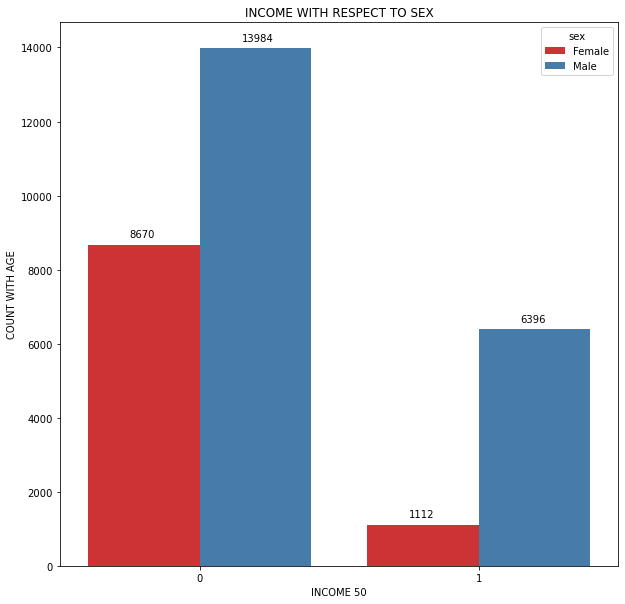

In [24]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='income',hue='sex',data=adult_new,palette='Set1')
ax.set(xlabel='INCOME 50')
ax.set(ylabel='COUNT WITH AGE')
ax.set_title('INCOME WITH RESPECT TO SEX')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.15,p.get_height()+200))

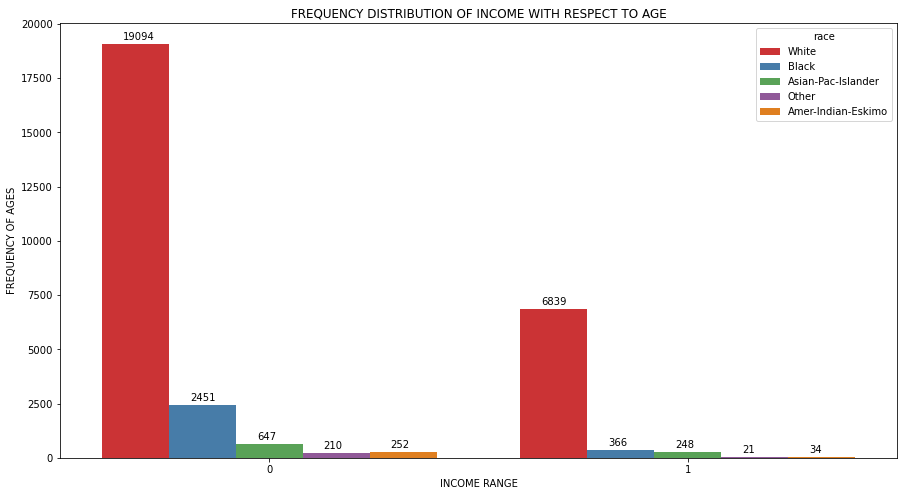

In [25]:
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x="income", hue="race", data=adult_new, palette="Set1")
ax.set_title("FREQUENCY DISTRIBUTION OF INCOME WITH RESPECT TO AGE")
ax.set(xlabel='INCOME RANGE',ylabel='FREQUENCY OF AGES')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05,p.get_height()+200))
plt.show()

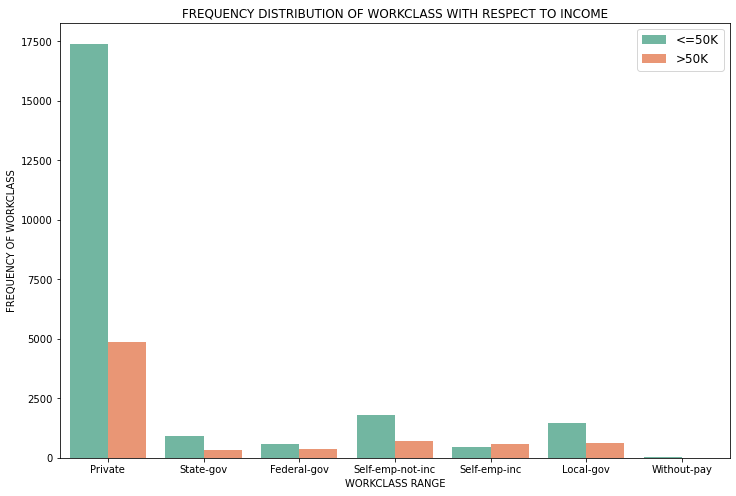

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=adult_new, palette="Set2")
ax.set_title("FREQUENCY DISTRIBUTION OF WORKCLASS WITH RESPECT TO INCOME")
ax.set(xlabel='WORKCLASS RANGE',ylabel='FREQUENCY OF WORKCLASS')
ax.legend(labels=['<=50K','>50K'],loc='upper right',fontsize='large')
plt.show()

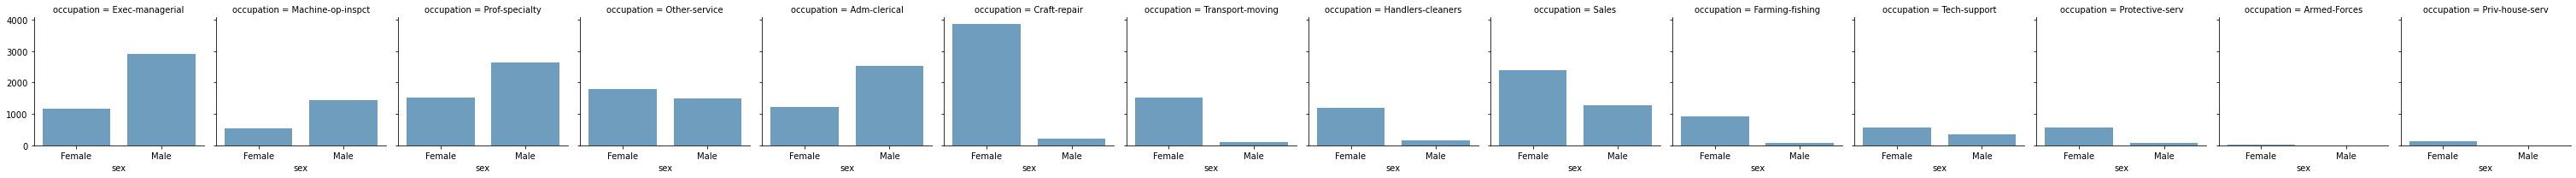

In [27]:
#adult1=sns.load_dataset("adult.csv")
g = sns.FacetGrid(adult, col="occupation")
g.map(sns.countplot,'sex',alpha=0.7)


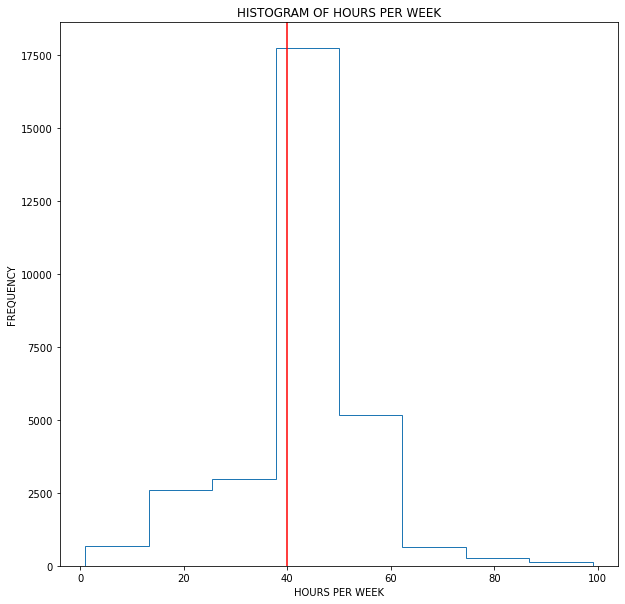

In [28]:
plt.figure(figsize=(10,10))
#sns.regplot(x='hours.per.week', y='fnlwgt',data=adult_new);
x=adult_new['hours.per.week']
plt.hist(x,bins=8,histtype='step')
plt.ylabel('FREQUENCY')#,xlabel='Hours per week')
plt.xlabel('HOURS PER WEEK')
plt.title('HISTOGRAM OF HOURS PER WEEK')
import statistics as stat
plt.axvline(stat.mode(x),color='red')
plt.show()

<p>Around 18K people work between 35 to 50 hours a day</p>

Maximum people around age  23  earn <=50K 

Maximum people around age  37  earn >50K 



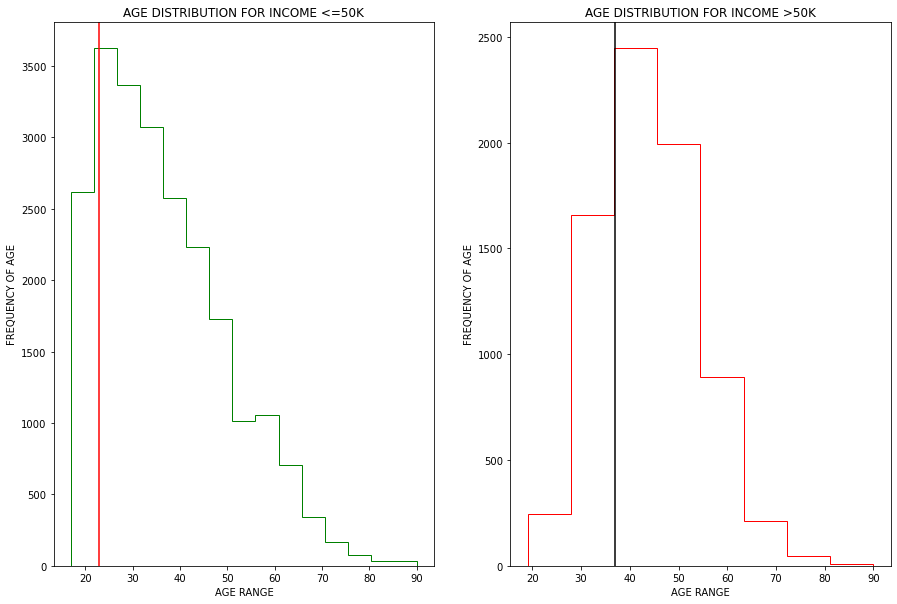

In [29]:
f,ax=plt.subplots(1,2,figsize=(15,10))

less=adult_new[adult_new['income']==0]
age_mode1=stat.mode(less.age)
more=adult_new[adult_new['income']!=0]
age_mode2=stat.mode(more.age)
#ax.axvline(age_mode1,age_mode2)
print('Maximum people around age ',age_mode1,' earn <=50K \n')
print('Maximum people around age ',age_mode2,' earn >50K \n')
ax[0].hist(less['age'],bins=15,histtype='step',color='green')
ax[0].set(xlabel='AGE RANGE',ylabel='FREQUENCY OF AGE')
ax[0].set_title('AGE DISTRIBUTION FOR INCOME <=50K')
ax[0].axvline(age_mode1,color='red')
ax[1].hist(more['age'],bins=8,histtype='step',color='red')
ax[1].set(xlabel='AGE RANGE',ylabel='FREQUENCY OF AGE')
ax[1].set_title('AGE DISTRIBUTION FOR INCOME >50K')
ax[1].axvline(age_mode2,color='black')
plt.show()

# BUILDING MACHINE LEARNING MODELS

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix,accuracy_score
chi2=adult_new1[features]

In the income share pie chart, there is a class imbalance problem. Models do not fit well when there is a class imbalance. I will do class oversampling using SMOTE(Synthetic Minority Oversampling  Technique). It creates new samples along the lines of the existing samples.

In [34]:
def train_print(clf,x_test,y_test):
    predictions = clf.predict(x_test)
    print('Precision report:\nprecision \t\t\t recall \t\t\t f-score \t\t\t support\n',
          precision_recall_fscore_support(y_test, predictions)[0],'\t',
          precision_recall_fscore_support(y_test, predictions)[1],
          '\t',precision_recall_fscore_support(y_test, predictions)[2],'\t',
          precision_recall_fscore_support(y_test, predictions)[3],'\n')
    print('Confusion matrix:\n',confusion_matrix(y_test, predictions),'\n')
    print('Accuracy score:',accuracy_score(y_test, predictions)*100,'\n')

LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

x = chi2.drop('income', axis=1)
y = chi2['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
X_train, Y_train = SMOTE().fit_sample(x_train, y_train)

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

train_print(logmodel,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.93550052 0.5878535 ] 	 [0.80310078 0.83530962] 	 [0.86425933 0.69006803] 	 [4515 1518] 

Confusion matrix:
 [[3626  889]
 [ 250 1268]] 

Accuracy score: 81.12050389524283 



In [36]:
# predict probabilities
lr_probs = logmodel.predict_proba(x_test)
#print(lr_probs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
#print(lr_probs)
ns_probs = [0 for _ in range(len(y_test))]
#print(ns_probs)

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Random Prediction: ROC AUC=0.500
Logistic: ROC AUC=0.903


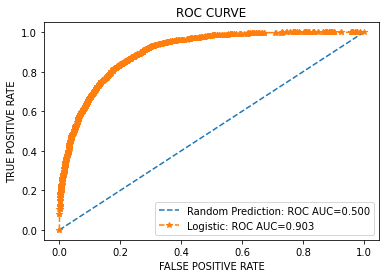

In [38]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
x = chi2.drop('income', axis=1)
y = chi2['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test
x_train, y_train = SMOTE().fit_sample(x_train, y_train)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

train_print(clf,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.93356017 0.54747475] 	 [0.76876567 0.83641975] 	 [0.84318641 0.66178266] 	 [6781 2268] 

Confusion matrix:
 [[5213 1568]
 [ 371 1897]] 

Accuracy score: 78.57221792463255 



In [40]:
# predict probabilities
dt_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
dt_probs1 = dt_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Deciison Tree: ROC AUC=%.3f' % (dt_auc))

Random Prediction: ROC AUC=0.500
Deciison Tree: ROC AUC=0.885


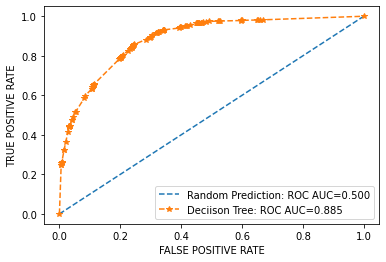

In [41]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs1)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--',marker='*',label='Deciison Tree: ROC AUC=%.3f' % (dt_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

NAIVE BAYES

In [42]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()

x = chi2.drop('income', axis=1)
y = chi2['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test
x_train, y_train = SMOTE().fit_sample(x_train, y_train)

# Train the model using the training sets
gnb = model.fit(x_train,y_train)

train_print(gnb,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.94835299 0.38919978] 	 [0.51650055 0.91633729] 	 [0.66876972 0.54634721] 	 [4515 1518] 

Confusion matrix:
 [[2332 2183]
 [ 127 1391]] 

Accuracy score: 61.7105917454003 



Random Prediction: ROC AUC=0.500
Naive Bayes: ROC AUC=0.819


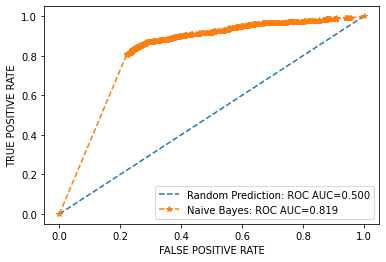

In [43]:
# predict probabilities
nb_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()


RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(min_samples_split=30)

x = chi2.drop('income', axis=1)
y = chi2['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test
x_train, y_train = SMOTE().fit_sample(x_train, y_train)

# Train the model using the training sets
rf.fit(x_train,y_train)

train_print(rf,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.92560526 0.64153627] 	 [0.85134936 0.79541446] 	 [0.8869258  0.71023622] 	 [6781 2268] 

Confusion matrix:
 [[5773 1008]
 [ 464 1804]] 

Accuracy score: 83.73300917228423 



Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.911


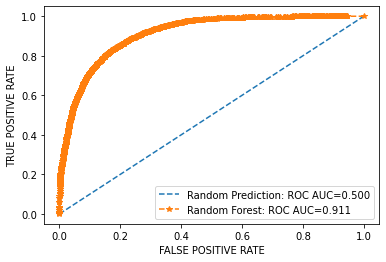

In [45]:
# predict probabilities
rf_probs = rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()


COMPARING ALL MODELS

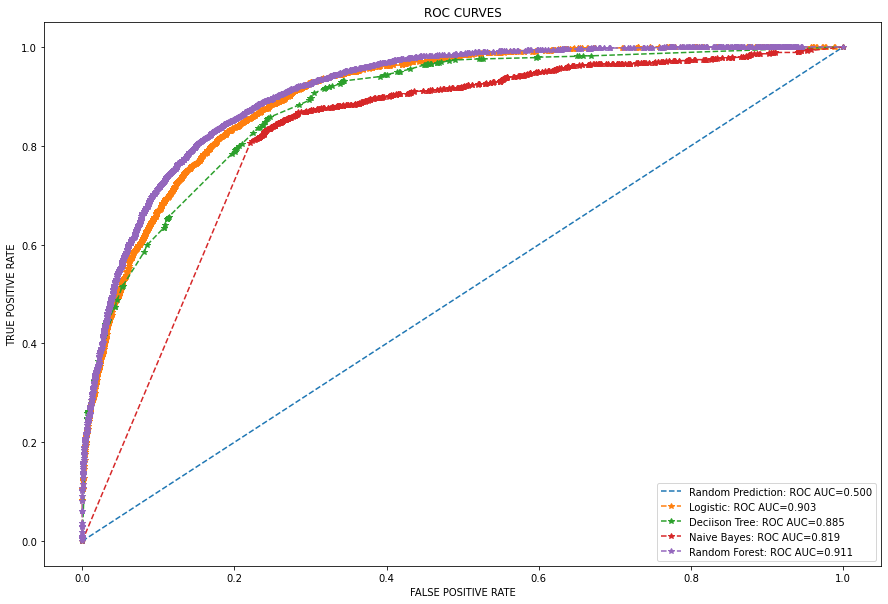

In [46]:
plt.figure(figsize=(15,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--',marker='*',label='Deciison Tree: ROC AUC=%.3f' % (dt_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
# show the legend
plt.legend()
# show the plot
plt.show()

# CONCLUSION

<p> Random Forest model will perform the best with area of 0.91 under the curve.</p>